# Plot maps of SST, SSS, sea level

CM2-025, CM2-1, OM2-025, OM2-1, observations

Variables extracted in 0_Calc_variables.ipynb

In [1]:
import intake
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cmocean as cm

In [2]:
from os import environ
environ["PYTHONWARNINGS"] = "ignore"

from dask.distributed import Client

client = Client(threads_per_worker=1)
client

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36823 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/36823/status,
Dashboard: /proxy/36823/status,Workers: 28
Total threads: 28,Total memory: 125.19 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:45083,Workers: 28
Dashboard: /proxy/36823/status,Total threads: 28
Started: Just now,Total memory: 125.19 GiB
Comm: tcp://127.0.0.1:35499,Total threads: 1
Dashboard: /proxy/42309/status,Memory: 4.47 GiB
Nanny: tcp://127.0.0.1:34581,


#### Define a few things first

In [3]:
# Path to data
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'
path_to_data_cz861 = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025_cz861/'

In [4]:
# Plotting info
ft_size = 12
plt.rcParams.update({'font.size': ft_size})
fig_path = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

In [5]:
# Define colours
CLEX_Red = '#DA1E48'
CLEX_Pink = '#F48580'
CLEX_SkyBlue = '#00BDF2'
CLEX_MidBlue = '#008DD0'
CLEX_CobaldBlue = '#0066B3'
CLEX_MidnightBlue = '#113559'
CLEX_Gray = '#4D4D47'

In [6]:
start_time = '0400-01-01'
end_time   = '0499-12-31'

#### Import data

CM2-025

In [7]:
SST_CM2_025 = xr.open_dataarray(path_to_data_cz861 + 'SST_global_annual_cz861.nc').mean('time')
SSS_CM2_025 = xr.open_dataarray(path_to_data_cz861 + 'SSS_global_annual_cz861.nc').mean('time')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/core/indexing.py:516: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data

In [8]:
sla_rms_CM2_025 = xr.open_dataarray(path_to_data_cz861 + 'sla_rms_CM2_025_400_499_cz861.nc')

CM2-1

In [9]:
SST_CM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/SST_CM2_1_annual.nc')
SST_CM2_1 = SST_CM2_1.sel(time=slice(start_time, end_time)).mean('time')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/core/indexing.py:516: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


In [10]:
SSS_CM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/SSS_CM2_1_annual_400_499.nc')
SSS_CM2_1 = SSS_CM2_1.mean('time')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/coding/times.py:1005: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-24.07/lib/python3.10/site-packages/xarray/core/indexing.py:516: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


In [11]:
sla_rms_CM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/sla_rms_CM2_1_400_499.nc')

OM2-025

In [12]:
SST_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/SST_OM2_025_annual.nc')
SST_OM2_025 = SST_OM2_025.sel(time=slice('2300-01-01', '2399-12-31')).mean('time')

In [13]:
SSS_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/SSS_OM2_025_annual_2300_2399.nc')
SSS_OM2_025 = SSS_OM2_025.mean('time')

In [14]:
sla_rms_OM2_025 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_025/sla_rms_OM2_025_2300_2399.nc')

OM2-1 (for zonal mean plot only)

In [15]:
SST_OM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/SST_OM2_1_annual.nc')
SST_OM2_1 = SST_OM2_1.sel(time=slice('2300-01-01', '2399-12-31')).mean('time')

In [16]:
SSS_OM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/SSS_OM2_1_annual_2420_2519.nc')
SSS_OM2_1 = SSS_OM2_1.mean('time')

In [17]:
sla_rms_OM2_1 = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_OM2_1/sla_rms_OM2_1_2420_2519.nc')

WOA13 observations for temperature and salinity

In [ ]:
WOA13_025 = xr.open_mfdataset('/g/data/ik11/observations/woa13/025_KDS50/woa13_ts_??_mom025.nc')
WOA13_025 = WOA13_025.rename({'GRID_Y_T': 'yt_ocean', 'GRID_X_T': 'xt_ocean', 'ZT': 'st_ocean'})
WOA13_025['yt_ocean'] = SST_CM2_025.yt_ocean
WOA13_025 = WOA13_025.mean('time').sel(st_ocean=0, method='nearest')
WOA13_025_temp = WOA13_025.temp.load()
WOA13_025_salt = WOA13_025.salt.load()

In [ ]:
WOA13_1 = xr.open_mfdataset('/g/data/ik11/observations/woa13/10_KDS50/woa13_ts_??_mom10.nc')
WOA13_1 = WOA13_1.rename({'GRID_Y_T': 'yt_ocean', 'GRID_X_T': 'xt_ocean', 'ZT': 'st_ocean'})
WOA13_1['yt_ocean'] = SST_CM2_1.yt_ocean
WOA13_1 = WOA13_1.mean('time').sel(st_ocean=0, method='nearest')
WOA13_1_temp = WOA13_1.temp.load()
WOA13_1_salt = WOA13_1.salt.load()

Compare models' sea level anomaly with AVISO SSH data.

In [20]:
aviso_file = '/g/data3/hh5/tmp/cosima/observations/original/AVISO_Mean_Std/aviso_ssh_monthly_anom_clim9314_GMSLtrend_removed.timstd.nc'
SLMA = xr.open_dataset(aviso_file).SLMA.mean('TAXM')

#### Calculate anomalies

In [21]:
temp_anom_CM2_025 = SST_CM2_025 - WOA13_025_temp
temp_anom_CM2_025 = temp_anom_CM2_025.where(temp_anom_CM2_025>-100, np.nan)

temp_anom_OM2_025 = SST_OM2_025 - WOA13_025_temp
temp_anom_OM2_025 = temp_anom_OM2_025.where(temp_anom_OM2_025>-100, np.nan)

temp_anom_CM2_1 = SST_CM2_1 - WOA13_1_temp
temp_anom_CM2_1 = temp_anom_CM2_1.where(temp_anom_CM2_1>-100, np.nan)

temp_anom_OM2_1 = SST_OM2_1 - WOA13_1_temp
temp_anom_OM2_1 = temp_anom_OM2_1.where(temp_anom_OM2_1>-100, np.nan)

In [22]:
salt_anom_CM2_025 = SSS_CM2_025-WOA13_025_salt
salt_anom_CM2_025 = salt_anom_CM2_025.where(SSS_CM2_025!=0, np.nan)

salt_anom_OM2_025 = SSS_OM2_025-WOA13_025_salt
#salt_anom_OM2_025 = salt_anom_OM2_025.where(salt_anom_OM2_025<10, np.nan)

salt_anom_CM2_1 = SSS_CM2_1-WOA13_1_salt
#salt_anom_CM2_1 = salt_anom_CM2_1.where(salt_anom_CM2_1<10, np.nan)

#### Coordinate information

In [23]:
geolon_t_025 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolon_t
geolat_t_025 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_025.nc').geolat_t

In [24]:
geolon_t_1 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc').geolon_t
geolat_t_1 = xr.open_dataset('/g/data/ik11/grids/ocean_grid_10.nc').geolat_t

In [25]:
temp_anom_CM2_025 = temp_anom_CM2_025.assign_coords({'geolon_t': geolon_t_025, 'geolat_t': geolat_t_025})
temp_anom_OM2_025 = temp_anom_OM2_025.assign_coords({'geolon_t': geolon_t_025, 'geolat_t': geolat_t_025})

temp_anom_CM2_1   = temp_anom_CM2_1.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})
temp_anom_OM2_1   = temp_anom_OM2_1.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})

In [26]:
salt_anom_CM2_025 = salt_anom_CM2_025.assign_coords({'geolon_t': geolon_t_025, 'geolat_t': geolat_t_025})
salt_anom_OM2_025 = salt_anom_OM2_025.assign_coords({'geolon_t': geolon_t_025, 'geolat_t': geolat_t_025})

salt_anom_CM2_1   = salt_anom_CM2_1.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})

In [27]:
sla_rms_CM2_025 = sla_rms_CM2_025.assign_coords({'geolon_t': geolon_t_025, 'geolat_t': geolat_t_025})
sla_rms_OM2_025 = sla_rms_OM2_025.assign_coords({'geolon_t': geolon_t_025, 'geolat_t': geolat_t_025})
sla_rms_CM2_1   = sla_rms_CM2_1.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})
sla_rms_OM2_1   = sla_rms_OM2_1.assign_coords({'geolon_t': geolon_t_1, 'geolat_t': geolat_t_1})

#### Plotting

In [28]:
import cartopy.feature as cft

land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='darkgrey', linewidth=0.5)

Figure 2: Temperature

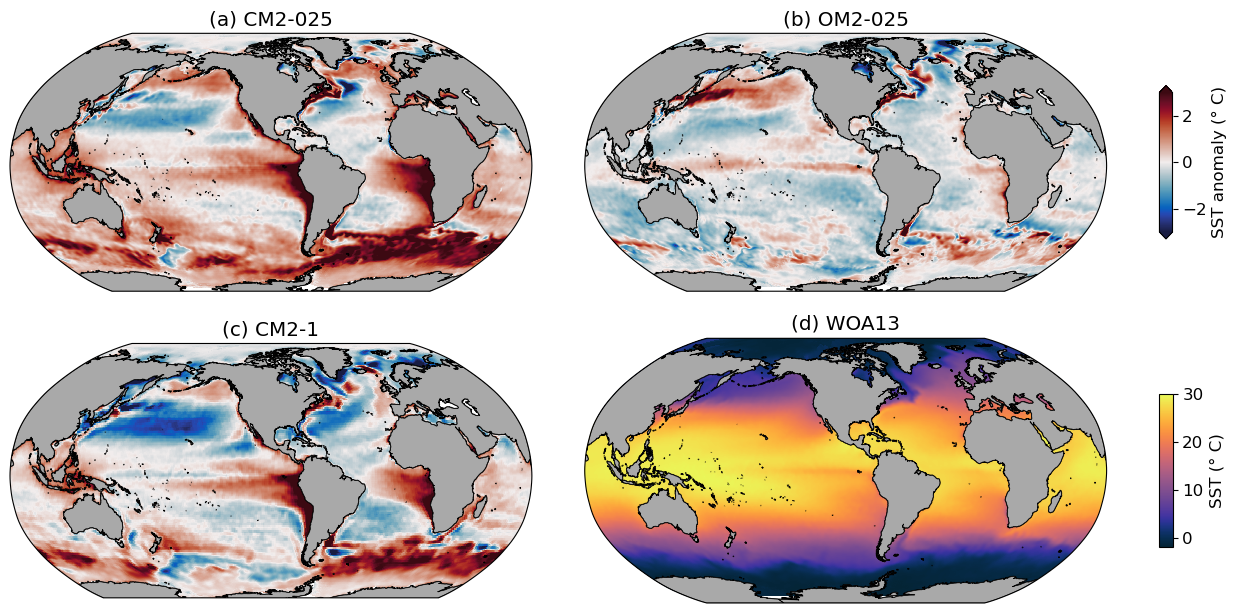

In [30]:
fig = plt.figure(figsize=(15,8))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.01, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = temp_anom_CM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(a) CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
temp_anom_OM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(b) OM2-025')

cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SST anomaly (° C)', extend='both')

ax = fig.add_subplot(gs[4:,0], projection=ccrs.Robinson(central_longitude=-100))
temp_anom_CM2_1.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-3, vmax=3, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(c) CM2-1')

ax = fig.add_subplot(gs[4:,1], projection=ccrs.Robinson(central_longitude=-100))
sc = WOA13_025_temp.plot(x='xt_ocean', y='yt_ocean', transform=ccrs.PlateCarree(), vmin=-2, vmax=30, cmap=cm.cm.thermal, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(d) WOA13')

cbar_ax = fig.add_subplot(gs[5:7, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SST (° C)')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig2_SST_map_cz861.png'
    plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight', facecolor='white');

Figure 3: Salinity

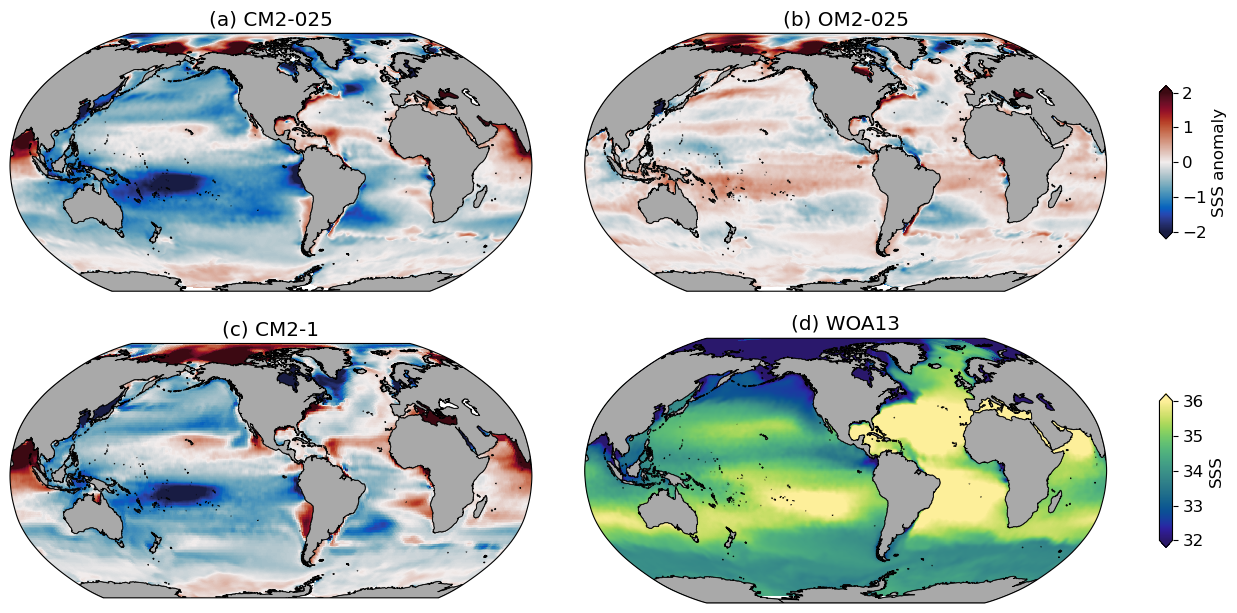

In [31]:
fig = plt.figure(figsize=(15,8))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.01, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = salt_anom_CM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(a) CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
salt_anom_OM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(b) OM2-025')

cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SSS anomaly', extend='both')

ax = fig.add_subplot(gs[4:,0], projection=ccrs.Robinson(central_longitude=-100))
salt_anom_CM2_1.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(c) CM2-1')

ax = fig.add_subplot(gs[4:,1], projection=ccrs.Robinson(central_longitude=-100))
sc = WOA13_025_salt.plot(x='xt_ocean', y='yt_ocean', transform=ccrs.PlateCarree(), vmin=32, vmax=36, cmap=cm.cm.haline, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(d) WOA13')

cbar_ax = fig.add_subplot(gs[5:7, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, label='SSS', extend='both')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig3_SSS_map_cz861.png'
    plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight', facecolor='white');

Figure 4: Sea level standard deviation

In [32]:
from palettable.scientific.sequential import Imola_20

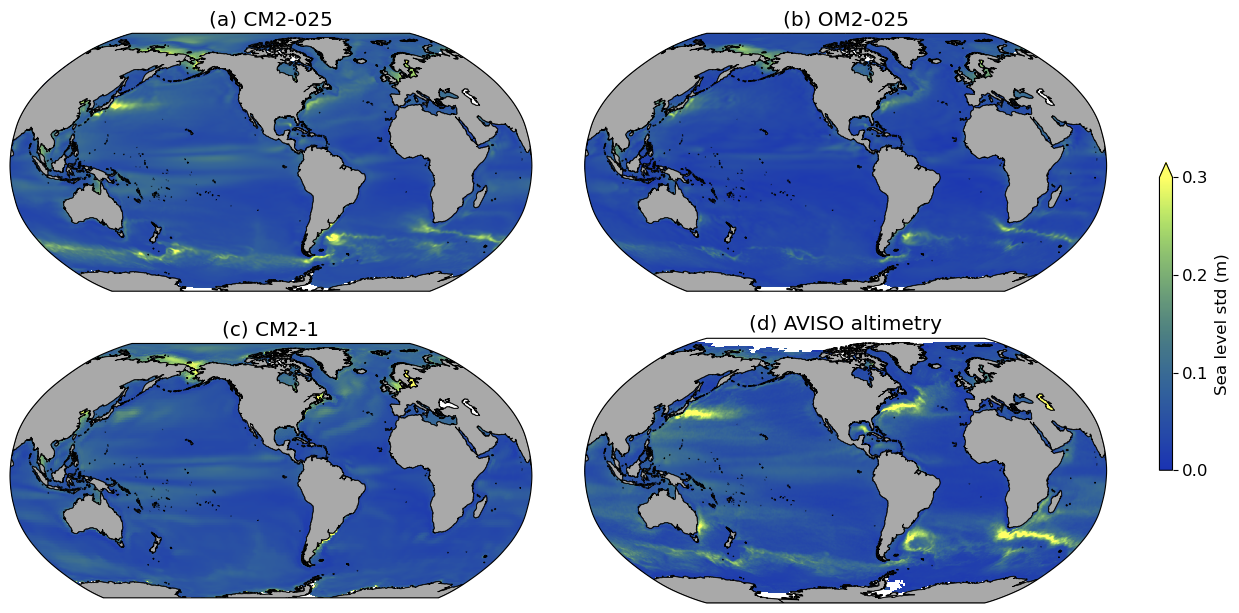

In [33]:
fig = plt.figure(figsize=(15,8))
gs  = gridspec.GridSpec(8, 3, width_ratios=[1, 1, 0.025], hspace=0.01, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = sla_rms_CM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=0, vmax=0.3, cmap=Imola_20.mpl_colormap, add_colorbar=False)
#mld_CM2_025_max.mean('time').plot.contour(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), levels=[3000], colour='y')
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(a) CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
sla_rms_OM2_025.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=0, vmax=0.3, cmap=Imola_20.mpl_colormap, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(b) OM2-025')

ax = fig.add_subplot(gs[4:,0], projection=ccrs.Robinson(central_longitude=-100))
sla_rms_CM2_1.plot(x='geolon_t', y='geolat_t', transform=ccrs.PlateCarree(), vmin=0, vmax=0.3, cmap=Imola_20.mpl_colormap, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
plt.title('(c) CM2-1')

ax = fig.add_subplot(gs[4:,1], projection=ccrs.Robinson(central_longitude=-100))
#sla_rms_OM2_1.plot(x='xt_ocean', y='yt_ocean', transform=ccrs.PlateCarree(), vmin=0, vmax=0.3, cmap=Imola_20.mpl_colormap, add_colorbar=False)
SLMA.plot(transform=ccrs.PlateCarree(), vmin=0, vmax=0.3, cmap=Imola_20.mpl_colormap, add_colorbar=False)
ax.coastlines(resolution='50m')
ax.add_feature(land_50m)
#plt.title('d) ACCESS-OM2-1')
plt.title('(d) AVISO altimetry')

cbar_ax = fig.add_subplot(gs[2:6, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(0, 0.31, 0.1), label='Sea level std (m)', extend='max')

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig4_rms_sla_map_cz861.png'
    plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight', facecolor='white');

Figure X: Additional figure showing zonal means for easier interpretation of differences between the models. This time, OM2-1 output is included. 

In [35]:
# Re-assign yt_coordinates for OM2-1
SST_OM2_1_zm = SST_OM2_1.mean('xt_ocean')
SST_OM2_1_zm = SST_OM2_1_zm.assign_coords({'yt_ocean': WOA13_1_temp.yt_ocean})

SSS_OM2_1_zm = SSS_OM2_1.mean('xt_ocean')
SSS_OM2_1_zm = SSS_OM2_1_zm.assign_coords({'yt_ocean': WOA13_1_salt.yt_ocean})

In [36]:
sla_rms_CM2_025_anomaly = sla_rms_CM2_025.mean('xt_ocean').interp(yt_ocean=SLMA.mean('LON').LAT) - SLMA.mean('LON')
sla_rms_CM2_1_anomaly   = sla_rms_CM2_1.mean('xt_ocean').interp(yt_ocean=SLMA.mean('LON').LAT) - SLMA.mean('LON')
sla_rms_OM2_025_anomaly = sla_rms_OM2_025.mean('xt_ocean').interp(yt_ocean=SLMA.mean('LON').LAT) - SLMA.mean('LON')
sla_rms_OM2_1_anomaly   = sla_rms_OM2_1.mean('xt_ocean').interp(yt_ocean=SLMA.mean('LON').LAT) - SLMA.mean('LON')

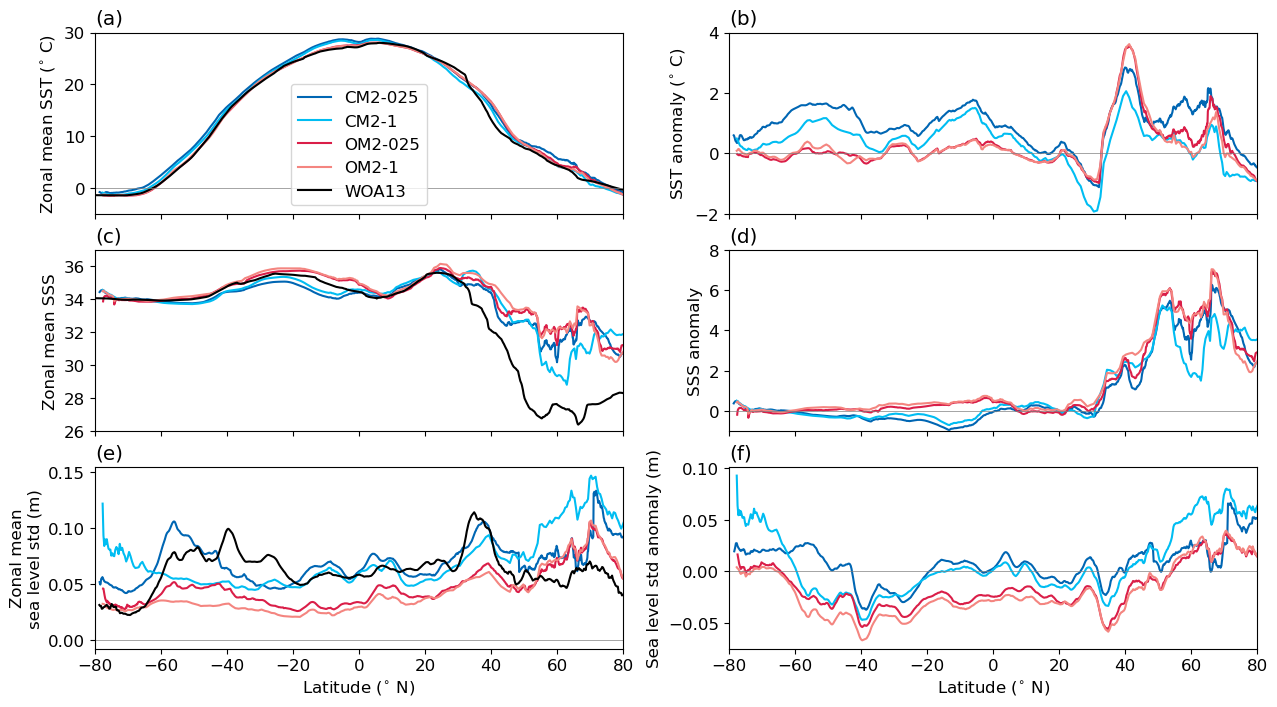

In [37]:
fig = plt.figure(figsize=(15,8))

plt.subplot(321)
SST_CM2_025.mean('xt_ocean').plot(color=CLEX_CobaldBlue, label='CM2-025')
SST_CM2_1.mean('xt_ocean').plot(color=CLEX_SkyBlue, label='CM2-1')
SST_OM2_025.mean('xt_ocean').plot(color=CLEX_Red, label='OM2-025')
SST_OM2_1_zm.plot(color=CLEX_Pink, label='OM2-1')
WOA13_025_temp.mean('xt_ocean').plot(color='k', label='WOA13')
plt.legend(ncol=1, fontsize=ft_size)
plt.axhline(0, color='0.5', linewidth=0.5)
plt.title(''), plt.title('(a)', loc='left')
plt.ylabel('Zonal mean SST ($^{\circ}$ C)')
plt.xlabel('')
plt.tick_params(labelbottom=False)
plt.xlim(-80, 80)
plt.ylim(-5, 30)

plt.subplot(322)
(SST_CM2_025.mean('xt_ocean')-WOA13_025_temp.mean('xt_ocean')).plot(color=CLEX_CobaldBlue, label='CM2-025')
(SST_CM2_1.mean('xt_ocean')-WOA13_1_temp.mean('xt_ocean')).plot(color=CLEX_SkyBlue, label='CM2-1')
(SST_OM2_025.mean('xt_ocean')-WOA13_025_temp.mean('xt_ocean')).plot(color=CLEX_Red, label='OM2-025')
(SST_OM2_1_zm-WOA13_1_temp.mean('xt_ocean')).plot(color=CLEX_Pink, label='OM2-1')
plt.axhline(0, color='0.5', linewidth=0.5)
plt.title(''), plt.title('(b)', loc='left')
plt.ylabel('SST anomaly ($^{\circ}$ C)')
plt.xlabel('')
plt.tick_params(labelbottom=False)
plt.xlim(-80, 80)
plt.ylim(-2, 4)

plt.subplot(323)
SSS_CM2_025.mean('xt_ocean').plot(color=CLEX_CobaldBlue, label='CM2-025')
SSS_CM2_1.mean('xt_ocean').plot(color=CLEX_SkyBlue, label='CM2-1')
SSS_OM2_025.mean('xt_ocean').plot(color=CLEX_Red, label='OM2-025')
SSS_OM2_1_zm.plot(color=CLEX_Pink, label='OM2-1')
WOA13_025_salt.mean('xt_ocean').plot(color='k', label='WOA13')
plt.axhline(0, color='0.5', linewidth=0.5)
plt.title(''), plt.title('(c)', loc='left')
plt.ylabel('Zonal mean SSS')
plt.xlabel('')
plt.tick_params(labelbottom=False)
plt.xlim(-80, 80)
plt.ylim(26, 37)
plt.yticks([26, 28, 30, 32, 34, 36])

plt.subplot(324)
(SSS_CM2_025.mean('xt_ocean')-WOA13_025_salt.mean('xt_ocean')).plot(color=CLEX_CobaldBlue, label='CM2-025')
(SSS_CM2_1.mean('xt_ocean')-WOA13_1_salt.mean('xt_ocean')).plot(color=CLEX_SkyBlue, label='CM2-1')
(SSS_OM2_025.mean('xt_ocean')-WOA13_025_salt.mean('xt_ocean')).plot(color=CLEX_Red, label='OM2-025')
(SSS_OM2_1_zm-WOA13_1_salt.mean('xt_ocean')).plot(color=CLEX_Pink, label='OM2-1')
plt.axhline(0, color='0.5', linewidth=0.5)
plt.title(''), plt.title('(d)', loc='left')
plt.ylabel('SSS anomaly')
plt.xlabel('')
plt.tick_params(labelbottom=False)
plt.xlim(-80, 80)
plt.ylim(-1, 8)

plt.subplot(325)
sla_rms_CM2_025.mean('xt_ocean').plot(color=CLEX_CobaldBlue, label='CM2-025')
sla_rms_CM2_1.mean('xt_ocean').plot(color=CLEX_SkyBlue, label='CM2-1')
sla_rms_OM2_025.mean('xt_ocean').plot(color=CLEX_Red, label='OM2-025')
sla_rms_OM2_1.mean('xt_ocean').plot(color=CLEX_Pink, label='OM2-1')
SLMA.mean('LON').plot(color='k', label='AVISO')
plt.axhline(0, color='0.5', linewidth=0.5)
plt.title(''), plt.title('(e)', loc='left')
plt.ylabel('Zonal mean\nsea level std (m)')
plt.xlabel('Latitude ($^{\circ}$ N)')
plt.xlim(-80, 80)

plt.subplot(326)
sla_rms_CM2_025_anomaly.plot(color=CLEX_CobaldBlue, label='CM2-025')
sla_rms_CM2_1_anomaly.plot(color=CLEX_SkyBlue, label='CM2-1')
sla_rms_OM2_025_anomaly.plot(color=CLEX_Red, label='OM2-025')
sla_rms_OM2_1_anomaly.plot(color=CLEX_Pink, label='OM2-1')
plt.axhline(0, color='0.5', linewidth=0.5)
plt.title(''), plt.title('(f)', loc='left')
plt.ylabel('Sea level std anomaly (m)')
plt.xlabel('Latitude ($^{\circ}$ N)')
plt.xlim(-80, 80)

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_SST_SSS_SSH_zonal_cz861.png'
    plt.savefig(fig_path + fig_name, dpi=300, bbox_inches='tight', facecolor='white');